In [1]:
# HIDDEN
from datascience import *
from prob140 import *
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
%matplotlib inline

## Metropolis Algorithm ##

The goal of Markov Chain Monte Carlo (MCMC) is to generate random samples from complicated high dimensional distributions about which we have incomplete information. For example, it might be that we don't know the normalizing constant of the distribution, as we saw in the code breaking example of the previous section.

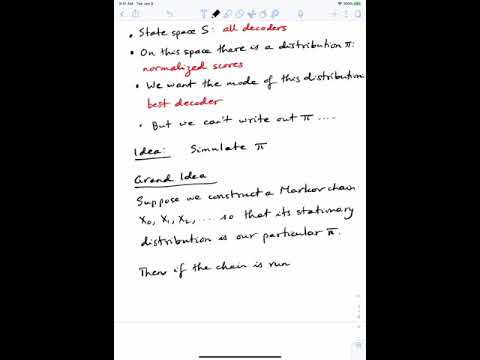

In [2]:
# VIDEO: Metropolis: Setup
from IPython.display import YouTubeVideo

YouTubeVideo('LwkIn66bkXc')

Imagine a large state space $S$. In our code-breaking example it is the space of all decoders, that is, all permutations of the alphabet.

Now suppose we are interested in a particular probability distribution on this space. We are going to call this probability distribution $\pi$. In the code-breaking example, $\pi$ is the distribution of scores of the decoders. Remember that while we can find the score of any particular decoder, we can't list them all, so we don't have a computational formula for $\pi$.

In the code-breaking setting, we are interested in the mode of $\pi$. That is, we are looking for the decoder that has the highest score.

Since can't compute $\pi$, the idea is to see if we can instead simulate a random variable that has distribution $\pi$. 

That is what MCMC does. The procedure relies on a few observations.

- Suppose we can create a Markov Chain $\{X_n\}$ that has our specified distribution $\pi$ as its stationary distribution. Then for large $n$ the distribution of $X_n$ will be approximately $\pi$.

- Suppose we can construct such a chain. By the definition of a mode, $X_n$ is most likely to be at or near the mode of $\pi$, when $n$ is large. So by running the chain for a long time we will be able to identify the mode of $\pi$.

- Creating a chain involves creating a transition matrix. To create a transition matrix that results in $\pi$ as the stationary distribution, the easiest way is to try to ensure that the detailed balance equations are solved. 

- The detailed balance equations are equivalent to  

$$
\frac{\pi(j)}{\pi(i)} ~ = ~  \frac{P(i, j)}{P(j, i)}, ~~ i \ne j
$$

The right hand side only involves the transition probabilities of the chain that we want to create. The left hand side only involves ratios of the terms in $\pi$, and therefore can be checked even if we don't know the constant that normalizes $\pi$.

### Metropolis Algorithm ###
Exactly who proposed the first algorithm to create such a Markov Chain is the subject of some debate. A general version was proposed by Hastings. Here we will describe an earlier version attributed to Metropolis and co-authors in 1953.

The goal is to create a transition matrix $\mathbb{P}$ so that $\pi$ and $\mathbb{P}$ together solve the detailed balance equations. 

The algorithm starts with any symmetric, irreducible transition matrix $\mathbb{Q}$ on the state space. For example, if the state space is numerical you could start with, "Wherever the chain is, it picks one of the three closest values (including itself) with probability $1/3$ each." For a pair of states $i$ and $j$, the transition probability $Q(i, j)$ is called the *proposal probability*.

The algorithm then introduces additional randomization to create a new chain that is irreducible and aperiodic and has $\pi$ as its stationary distribution.

Here are the rules that determine the transitions of the new chain.

- Suppose the chain is at $i$ at time $n$, that is, suppose $X_n = i$. Pick a state $j$ according to the proposal probability $Q(i, j)$. This $j$ is the candidate state to which your chain might move.

- Define the *acceptance ratio*

$$
r(i, j) = \frac{\pi(j)}{\pi(i)}
$$

- If $r(i, j) \ge 1$, set $X_{n+1} = j$.

- If $r(i, j) < 1$, toss a coin that lands heads with chance $r(i, j)$. 
     - If the coin lands heads, set $X_{n+1} = j$. 
     - If the coin lands tails, set $X_{n+1} = i$.
- Repeat all the steps, with $X_{n+1}$ as the starting value.

Thus the new chain either moves to the state picked according to $\mathbb{Q}$, or it stays where it is. We say that it *accepts a move to a new state* based on $\mathbb{Q}$ and $r$, and otherwise it doesn't move. 

The new chain is irreducible because the proposal chain is irreducible. It is aperiodic because it can stay in place. So it has a steady state distribution. 

The alogrithm says that this steady state distribution is the same as the distribution $\pi$ that was used to define the ratios $r(i, j)$.

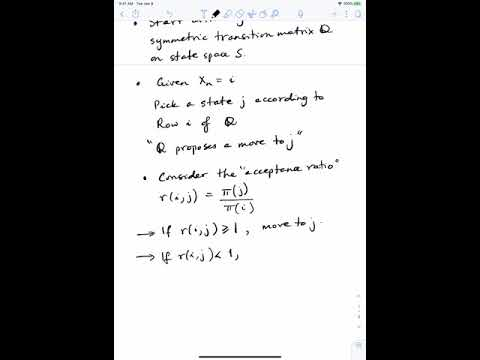

In [3]:
# VIDEO: Metropolis Algorithm

YouTubeVideo('0_JsYu1NpBo')

### How to Think About the Algorithm ###
Before we prove that the algorithm works, let's examine what it is doing in the context of decoders.

First notice that we are requiring $\mathbb{Q}$ to be symmetric as well as irreducible. The symmetry requirement makes sense as each detailed balance equation involves transitions $i \to j$ as well as $j \to i$.

Fix any starting decoder and call it $i$. Now you have to decide where the chain is going to move next, that is, what the next decoder is going to be. The algorithm starts this process off by picking a decoder $j$ according to $\mathbb{Q}$. We say that *$\mathbb{Q}$ proposes a move to $j$*.

To decide whether or not the chain should move to $j$, remember that the distribution $\pi$ contains the likelihoods of all the decoders. You want to end up with decoders that have high likelihood, so it is natural to compare $\pi(i)$ and $\pi(j)$.

The algorithm does this by comparing the *acceptance ratio* $r(i, j) = \pi(j)/\pi(i)$ to 1. 

- If $r(i, j) \ge 1$, the likelihood of $j$ is at least as large that of $i$, so you *accept the proposal* and move to $j$. 

- If $r(i, j) < 1$, the proposed decoder $j$ has *less* likelihood than the current $i$, so it is tempting to stay at $i$. But this risks the chain getting stuck at a local maximum. The algorithm provides a chance to avoid this, by tossing a biased coin. If the coin lands heads, the chain moves to $j$ even though $j$ has a *lower* likelihood than the current decoder $i$. The idea is that from this new position there might be paths to decoders that have the highest likelihoods of all.

### The Algorithm Works ###
We will now show that the detailed balance equations are solved by the desired limit distribution $\pi$ and the transition matrix $\mathbb{P}$ of the chain created by the Metropolis algorithm.

Take any two distinct states $i$ and $j$.

#### Case 1: $\pi(i) = \pi(j)$ ####
Then $r(i, j) = 1$. By the algorithm, $P(i, j) = Q(i, j)$ and also $P(j, i) = Q(j, i) = Q(i, j)$ by the symmetry of $Q$. 

Therefore $P(i, j) = P(j, i)$ and the detailed balance equation $\pi(i)P(i, j) = \pi(j)P(j, i)$ is satisfied.

#### Case 2: $\pi(j) < \pi(i)$ ####
Then $r(i, j) < 1$, so

$$
P(i, j) ~=~ Q(i, j)r(i, j) 
~=~ Q(j, i)\frac{\pi(j)}{\pi(i)} ~~~~ \text{ by the symmetry of } Q \text{ and definition of }r 
$$

Now $r(j, i) > 1$, so the algorithm says $P(j, i) = Q(j, i)$.

Therefore

$$
P(i, j) ~ = ~ P(j, i)\frac{\pi(j)}{\pi(i)}
$$

which is the same as

$$
\pi(i)P(i, j) ~ = ~ \pi(j)P(j, i)
$$

#### Case 2: $\pi(j) > \pi(i)$ ####
Reverse the roles of $i$ and $j$ in Case 2.

That's it! A simple and brilliant idea that provides a solution to a difficult problem. In lab, you will see it in action when you implement the algorithm to decode text.